In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

Reading the image 

In [2]:
image=cv.imread("Shapes5.jpeg")

Converting the image form colour scale to gray scale

In [3]:
grayimage=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

Storing the grayscale image

In [4]:
cv.imwrite("GrayImage_shapes.jpeg",grayimage)

True

In [5]:
grayimage1=cv.imread("GrayImage_shapes.jpeg",0)

In [6]:
array=np.array(grayimage1)

Converting the grayscale image to black and white by making use of threshold value 128

In [7]:
for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        if (array[i,j]>128):
            array[i,j]=255
        else:
            array[i,j]=0

In [8]:
req_bw=Image.fromarray(array)

In [9]:
array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

0 means no light meaning black and 255 means maximum light meaning white

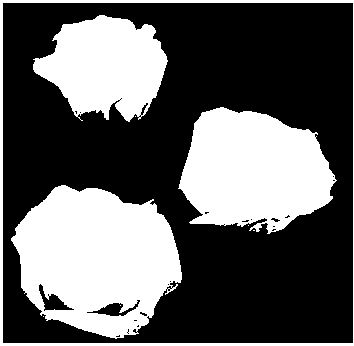

In [10]:
req_bw

In [11]:
req_bw.save("Atlast.jpeg")

In order to display the image , read using PIL and display using display function from IPython

In [12]:
im=Image.open("Shapes5.jpeg")

Displaying original image

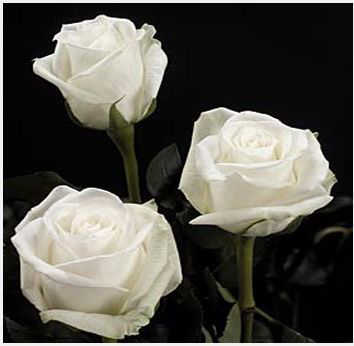

In [13]:
display(im)

In [14]:
im=Image.open("GrayImage_shapes.jpeg")

Displaying Gray image

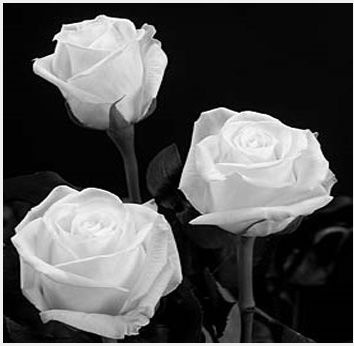

In [15]:
display(im)

In [16]:
im=Image.open("Atlast.jpeg")

Displaying black and white image

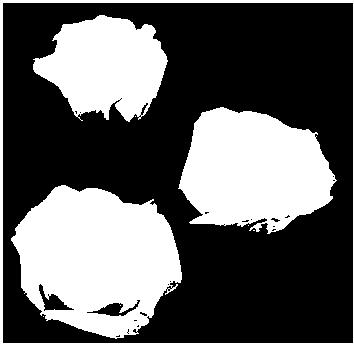

In [17]:
display(im)

In [18]:
input=np.array(im)

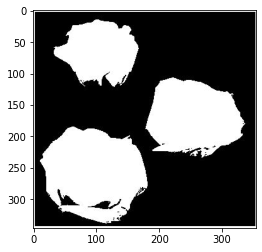

In [19]:
plt.imshow(input,cmap='gray')

Made use of BFS(Breadth First Search) to identify components of an image. Colours help us to identify components visually.

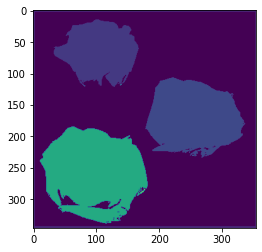

In [20]:
class queue:
    def __init__(self):
        self.front=-1
        self.rear=-1
        self.arr=[]
    def enqueue(self,ele):
        self.rear=self.rear+1
        self.arr.append(ele)
    def dequeue(self):
        if (self.front==self.rear):
            print("Queue empty")
        else:
            self.front=self.front+1
            return self.arr[self.front]
    def isnotempty(self):
        if (self.front==self.rear):
            return 0
        else:
            return 1
    def display(self):
        for i in self.arr:
            print(i,end=" ")
flag=2
def bfs(input,output):
    a=queue()
    b=queue()
    end=1
    rowcount=input.shape[0]
    columncount=input.shape[1]
    global flag
    for i in range(rowcount-1):
        for j in range (columncount-1):
            if (input[i,j]==255 and output[i,j]==0):
                a.enqueue(i)
                b.enqueue(j)
                end=0
                break
        if (end==0):
            break
    if (end==1):
        plt.imshow(output)
        return
    '''the above for loop along  helps us to find the uncovered pixels  . 
     If input pixel is 255 and output pixel is 0 means we have not covered that pixel yet so 
      we enqueue the pixel by enqueue the pixel we mean pushing the row and column index.
      If end is 1 it means we have covered all the pixels'''



    while (a.isnotempty()):
        c=a.dequeue()
        d=b.dequeue()
        #flag means colour
        output[c,d]=flag
        if (c!=0):
          #if input[c-1,d] is 255 and output[c-1,d] is 0 it indicates it has not been assigned color yet
          #so we assign component color(flag) to it .
          #This is the upward pixel.
            if (input[c-1,d]==255 and output[c-1,d]==0):
                a.enqueue(c-1)
                b.enqueue(d)
                output[c-1,d]=flag
          #This is the left pixel.
        if (d!=0):
            if (input[c,d-1]==255 and output[c,d-1]==0):
                a.enqueue(c)
                b.enqueue(d-1)
                output[c,d-1]=flag
          #This is the upward pixel.
        if (c!=rowcount-1):
            if (input[c+1,d]==255 and output[c+1,d]==0):
                a.enqueue(c+1)
                b.enqueue(d)
                output[c+1,d]=flag
          #This is the right pixel.
        if (d!=columncount-1):
            if (input[c,d+1]==255 and output[c,d+1]==0):
                a.enqueue(c)
                b.enqueue(d+1)
                output[c,d+1]=flag
    flag=flag+1
    return bfs(input,output)
input=array
output=np.full((array.shape[0],array.shape[1]),0)
bfs(input,output)